<a href="https://colab.research.google.com/github/sudev-das-p/Assessment2B/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
user_engagement = pd.read_csv('/content/sample_data/takehome_user_engagement.csv',parse_dates = ['time_stamp'])
user = df = pd.read_csv('/content/sample_data/takehome_users.csv', encoding='ISO-8859-1')
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'],unit = 's')
user['last_session_creation_time'].interpolate(method='bfill', inplace=True)
print(user.shape)
user['creation_source'].value_counts(normalize = True)

(12000, 10)


ORG_INVITE            0.354500
GUEST_INVITE          0.180250
PERSONAL_PROJECTS     0.175917
SIGNUP                0.173917
SIGNUP_GOOGLE_AUTH    0.115417
Name: creation_source, dtype: float64

In [ ]:
import pandas as pd
import numpy as np # For mathematical calculations 
import seaborn as sns # For data visualization 
import matplotlib.pyplot as plt # For plotting graphs
%matplotlib inline
import warnings # To ignore any warnings 
from datetime import datetime
user['last_session_creation_time'] = pd.to_datetime(user['last_session_creation_time'],unit = 's')
user['last_session_creation_time'].interpolate(method='bfill', inplace=True)


In [ ]:
user_engagement = pd.read_csv('/content/sample_data/takehome_user_engagement.csv',parse_dates = ['time_stamp'])
user = df = pd.read_csv('/content/sample_data/takehome_users.csv', encoding='ISO-8859-1')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
encoded = ohe.fit_transform(user[['creation_source']])
encoded_df = pd.DataFrame(encoded, columns = ['guest_invite','org_invite','personal_project','signup','signup_google_auth'])
user = pd.concat([user,encoded_df],axis = 1)
user = user.drop('creation_source',axis = 1)

In [57]:
grouped = user_engagement.groupby('user_id').resample('7D', on='time_stamp').sum()
result = grouped[grouped['visited'] >= 3].user_id.unique()
user['adopted_or_not'] = user['object_id'].isin(result)

In [ ]:
user['adopted_or_not'].value_counts(normalize = True)

Non Adopted    0.911333
Adopted        0.088667
Name: adopted_or_not, dtype: float64

In [58]:
user['opted_in_to_mailing_list'].replace(1,True,inplace = True)
user['opted_in_to_mailing_list'].replace(0,False,inplace = True)
user['enabled_for_marketing_drip'].replace(1,True,inplace = True)
user['enabled_for_marketing_drip'].replace(0,False,inplace = True)
user['guest_invite'].replace(1,True,inplace = True)
user['guest_invite'].replace(0,False,inplace = True)
user['org_invite'].replace(0,False,inplace = True)
user['org_invite'].replace(1,True,inplace = True)
user['personal_project'].replace(1,True,inplace = True)
user['personal_project'].replace(0,False,inplace = True)
user['signup'].replace(1,True,inplace = True)
user['signup'].replace(0,False,inplace = True)
user['signup_google_auth'].replace(1,True,inplace = True)
user['signup_google_auth'].replace(0,False,inplace = True)
user

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,guest_invite,org_invite,personal_project,signup,signup_google_auth,adopted_or_not
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,True,False,11,10803.0,True,False,False,False,False,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,False,False,1,316.0,False,True,False,False,False,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,False,False,94,1525.0,False,True,False,False,False,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2013-05-22 08:09:28,False,False,1,5151.0,True,False,False,False,False,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2013-01-22 10:14:20,False,False,193,5240.0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,2013-09-06 06:14:15,False,False,89,8263.0,False,True,False,False,False,False
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,2013-01-15 18:28:37,False,False,200,NaN,False,False,False,False,True,False
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,2014-04-27 12:45:16,True,True,83,8074.0,True,False,False,False,False,False
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,2012-06-02 11:55:59,False,False,6,NaN,False,False,True,False,False,False


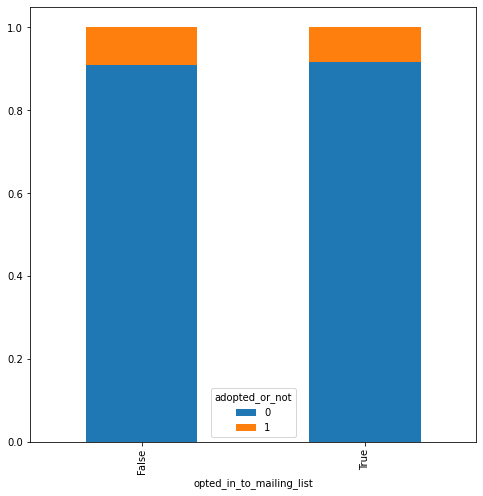

In [56]:
mailing_list=pd.crosstab(user['opted_in_to_mailing_list'],user['adopted_or_not']) 
mailing_list.div(mailing_list.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))

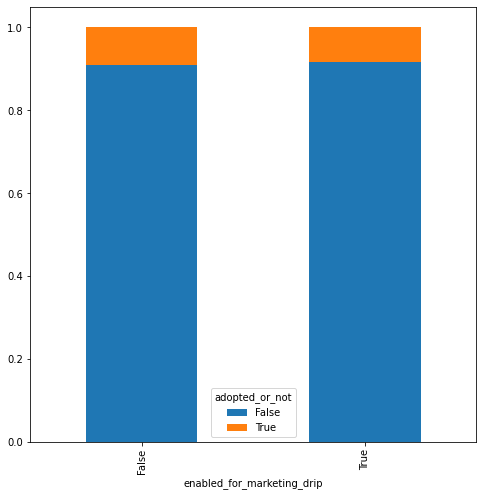

In [61]:
marketing_drip=pd.crosstab(user['enabled_for_marketing_drip'],user['adopted_or_not']) 
marketing_drip.div(marketing_drip.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))

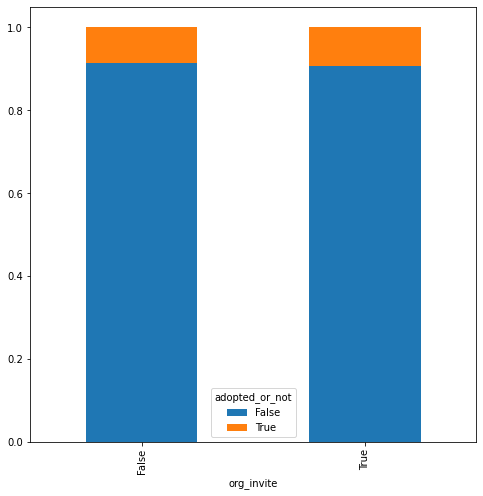

In [63]:
org_invite=pd.crosstab(user['org_invite'],user['adopted_or_not']) 
org_invite.div(org_invite.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))

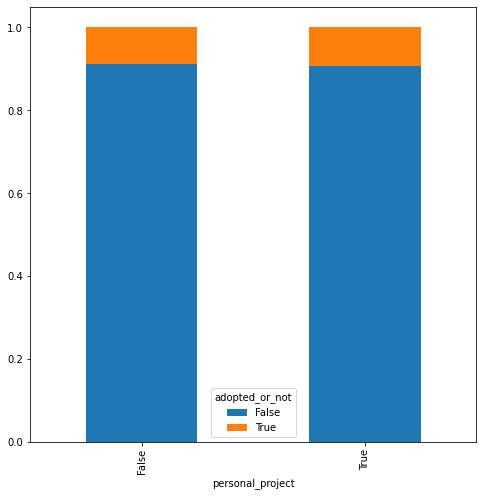

In [64]:
personal_project=pd.crosstab(user['personal_project'],user['adopted_or_not']) 
personal_project.div(personal_project.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))

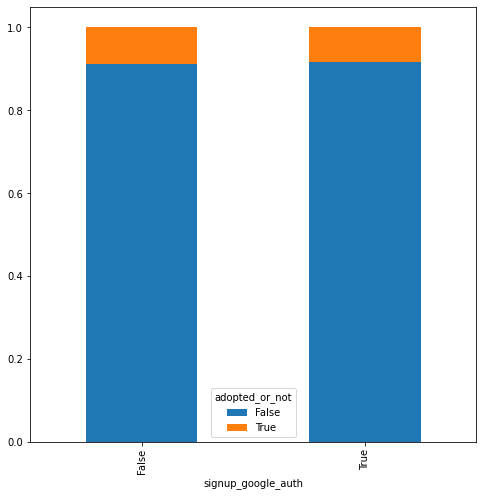

In [65]:
signup_google_auth=pd.crosstab(user['signup_google_auth'],user['adopted_or_not']) 
signup_google_auth.div(signup_google_auth.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))

In [43]:
X = user[['opted_in_to_mailing_list',	'enabled_for_marketing_drip'	,'org_id',	'guest_invite',	'org_invite',	'personal_project',	'signup',	'signup_google_auth']]
y = user.iloc[:,-1]

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,guest_invite,org_invite,personal_project,signup,signup_google_auth,adopted_or_not
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,2014-04-22 03:53:30,True,False,11,10803.0,True,False,False,False,False,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,2014-03-31 03:45:04,False,False,1,316.0,False,True,False,False,False,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,2013-03-19 23:14:52,False,False,94,1525.0,False,True,False,False,False,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,2013-05-22 08:09:28,False,False,1,5151.0,True,False,False,False,False,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,2013-01-22 10:14:20,False,False,193,5240.0,True,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,2013-09-06 06:14:15,False,False,89,8263.0,False,True,False,False,False,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,2013-01-15 18:28:37,False,False,200,NaN,False,False,False,False,True,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,2014-04-27 12:45:16,True,True,83,8074.0,True,False,False,False,False,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,2012-06-02 11:55:59,False,False,6,NaN,False,False,True,False,False,0


In [45]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [49]:

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(X_train, y_train)
model.score(X_test,y_test)
pred = model.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0])

# New section